Imports libaries

In [1]:
import cv2
import numpy as np

Loading YOLO Model

In [2]:
# Load YOLO file/
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []

Loading class names and initializing camera

In [3]:
# Load class names from coco file
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Load video from the default camera.
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to a blob that YOLO can process
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob) # Set the input blob for the neural network
    outs = net.forward(net.getUnconnectedOutLayersNames()) # Forward pass the input blob through the network to get detections

    # Process YOLO output
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5: # Filter detections by confidence threshold
                center_x = int(detection[0] * frame.shape[1])
                center_y = int(detection[1] * frame.shape[0])
                width = int(detection[2] * frame.shape[1])
                height = int(detection[3] * frame.shape[0])

                x = int(center_x - width / 2)
                y = int(center_y - height / 2)

                # Draw box and label on the frame
                cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)
                label = f"{classes[class_id]}: {confidence:.2f}"
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with detections
    cv2.imshow("Live Analysis", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): # Quit if 'q' key is pressed.
        break

cap.release()
cv2.destroyAllWindows()

Screenshot

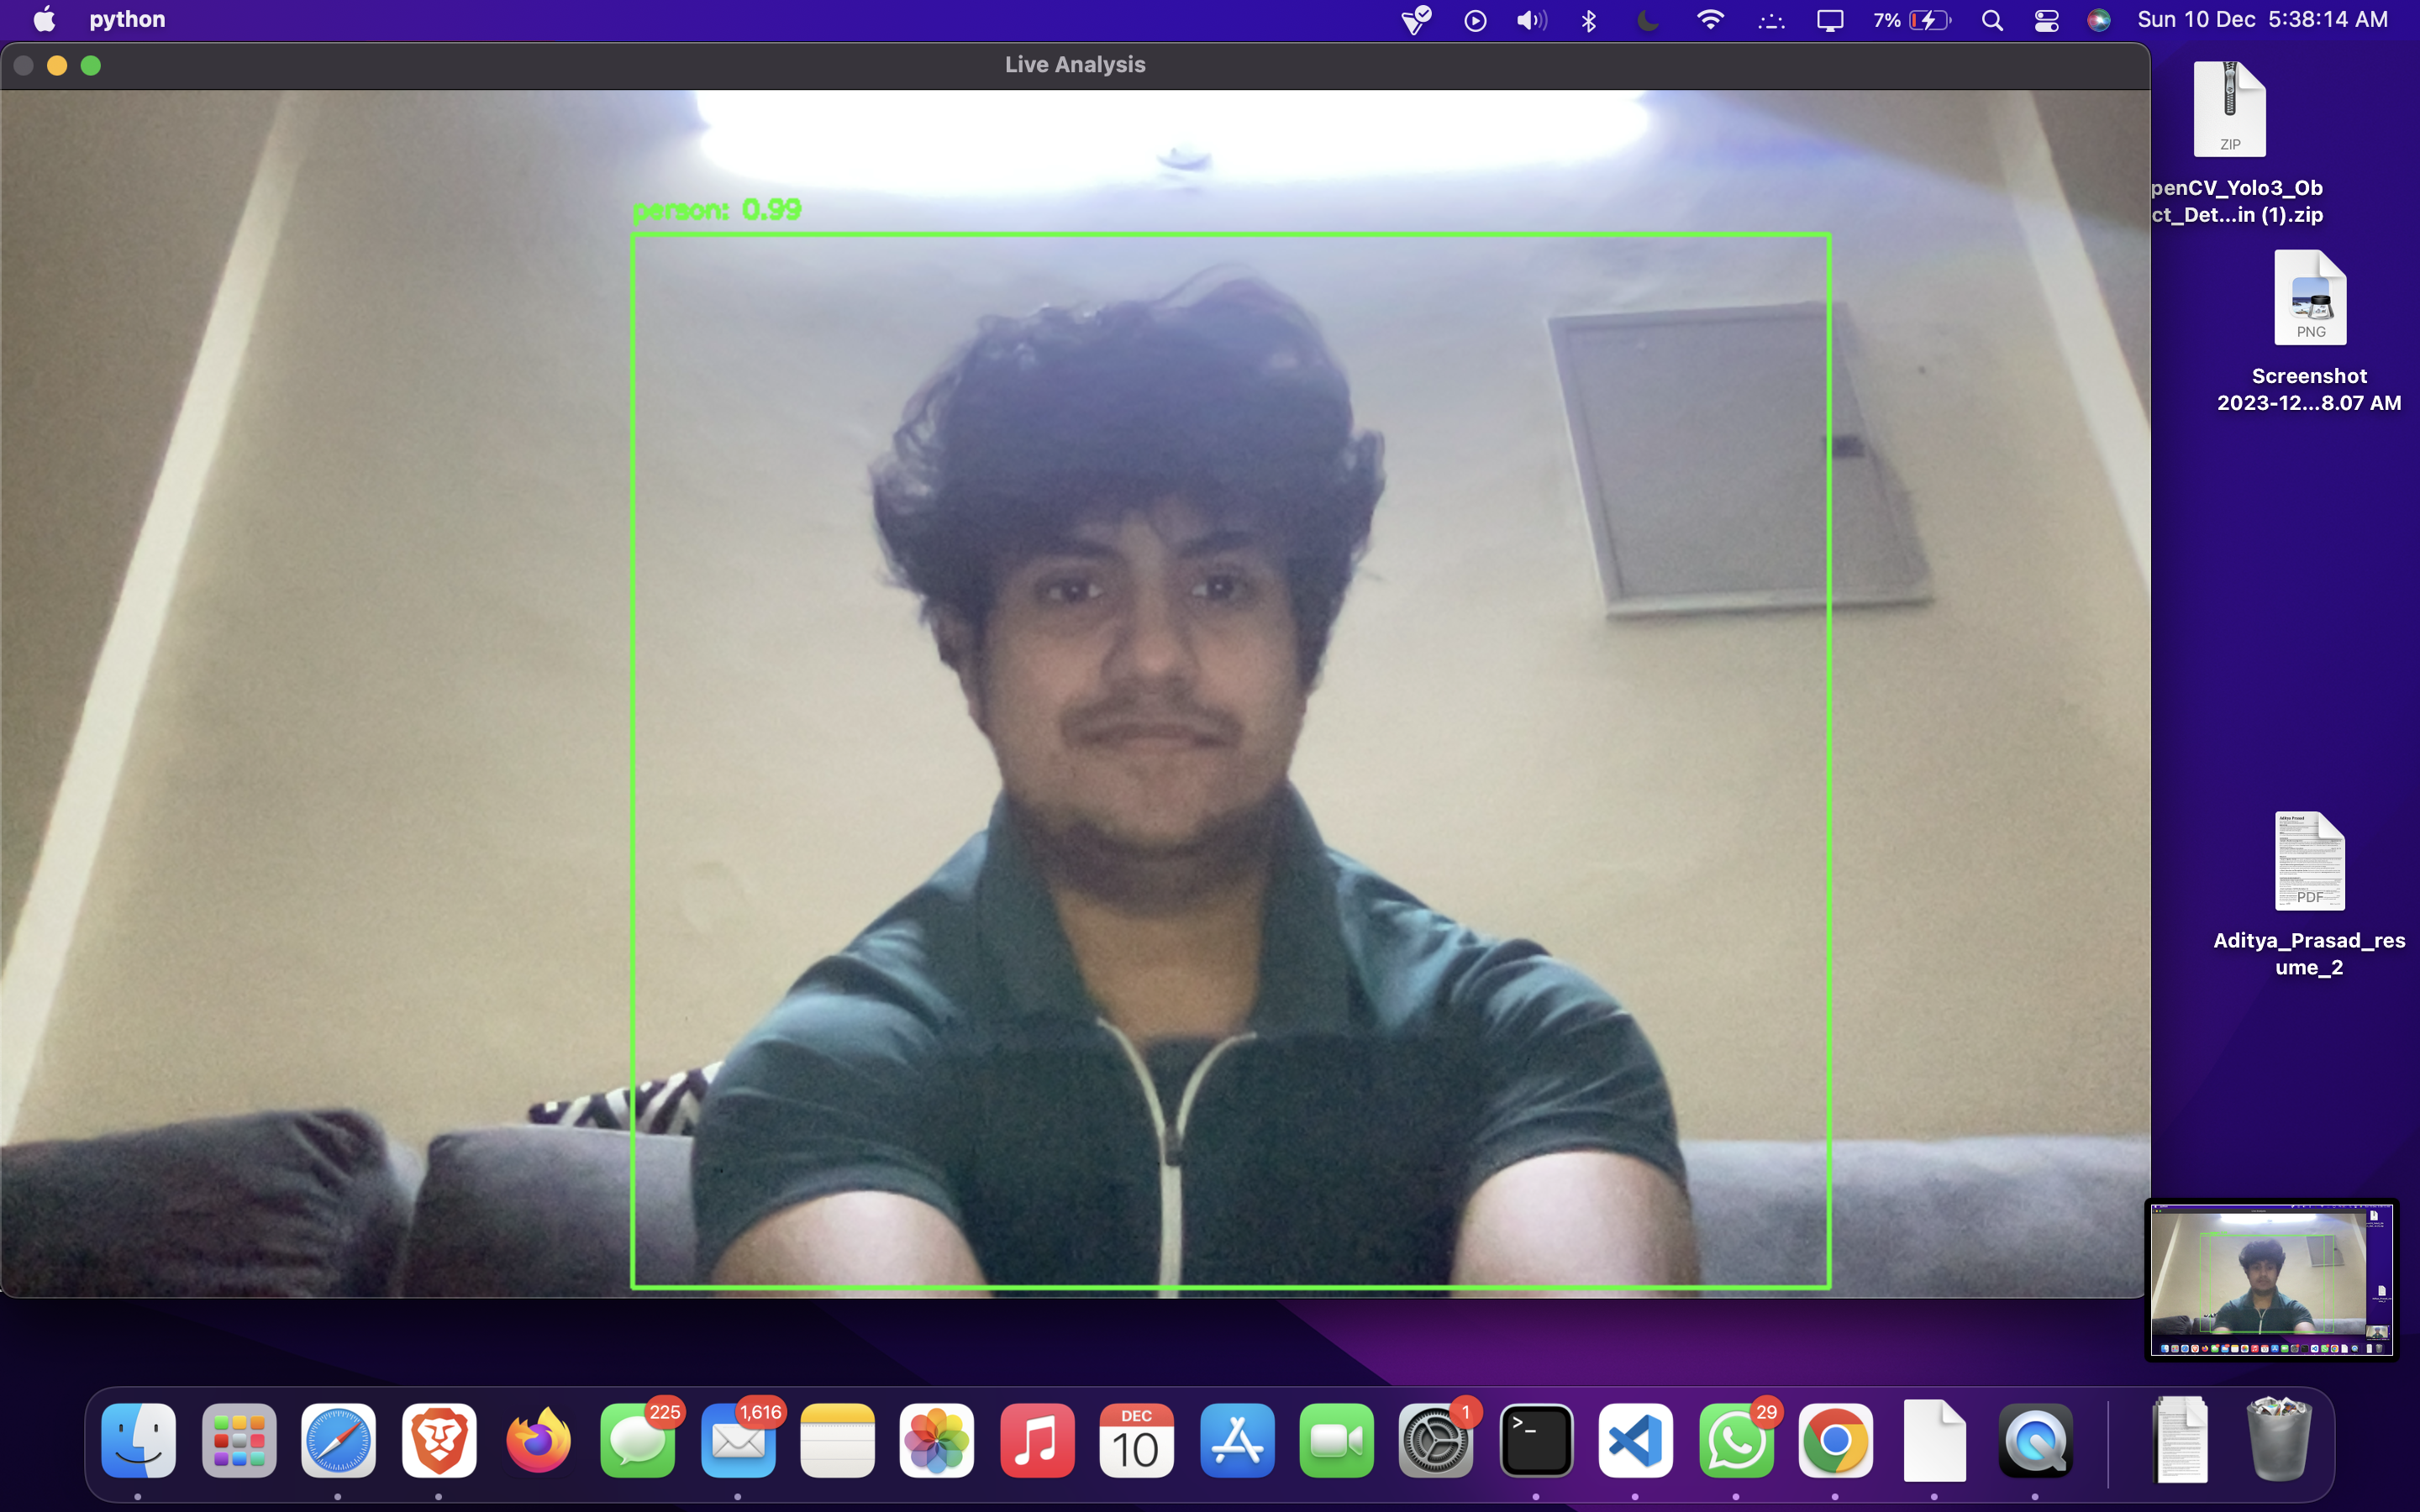